
AUTHOR: Lok Yee Joey Cheung

This file is used to perform Exploratory Data Analysis

# Exploratory Data Analysis


### Installation and data preparation

In [ ]:
import torch
import numpy as np
import re
import nltk
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pd.set_option('display.max_colwidth', 1000)

seed = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data7901,7903/data/samsum-train.csv')
test = pd.read_csv('/content/drive/MyDrive/data7901,7903/data/samsum-test.csv')
val = pd.read_csv('/content/drive/MyDrive/data7901,7903/data/samsum-validation.csv')

In [ ]:
frames = [train, test, val]
full = pd.concat(frames)

### Data Cleaning

Remove null values

In [ ]:
# removing null values
train = train.dropna()
test = test.dropna()
val = val.dropna()
full = full.dropna()

### Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

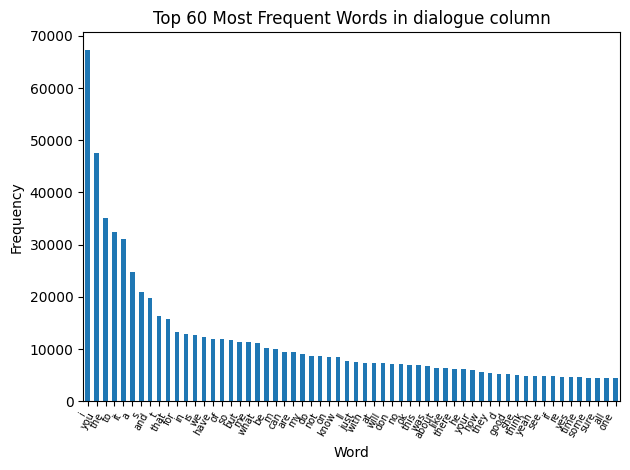

<Figure size 1000x600 with 0 Axes>

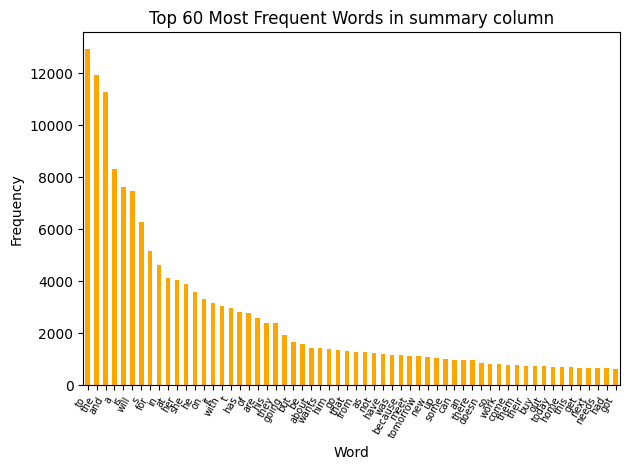

In [ ]:
#Show words frequency
def wordfreq(data, column, color):
  data[column] = data[column].astype(str)
  text = ' '.join(data[column])

  # Tokenize the text into words and count frequency
  words = re.findall(r'\b\w+\b', text.lower())
  word_freq = Counter(words)
  word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])

  # Sort the word frequency in descending order
  word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

  # Plot the histogram
  plt.figure(figsize=(10, 6))
  word_freq_df.head(60).plot(kind='bar', legend=None,color=color)
  plt.title(f'Top 60 Most Frequent Words in {column} column')
  plt.xlabel('Word')
  plt.ylabel('Frequency')
  plt.xticks(rotation=60, ha='right',fontsize=7)
  plt.tight_layout()
  plt.show()

wordfreq(full, 'dialogue','#1f77b4')
wordfreq(full, 'summary','orange')

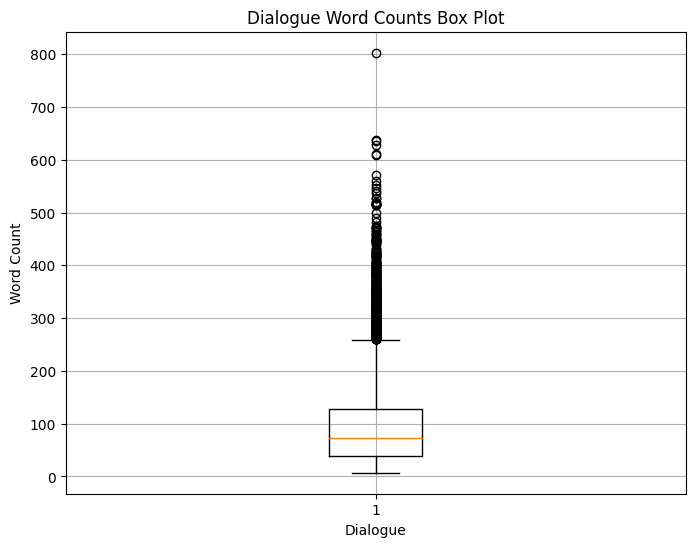

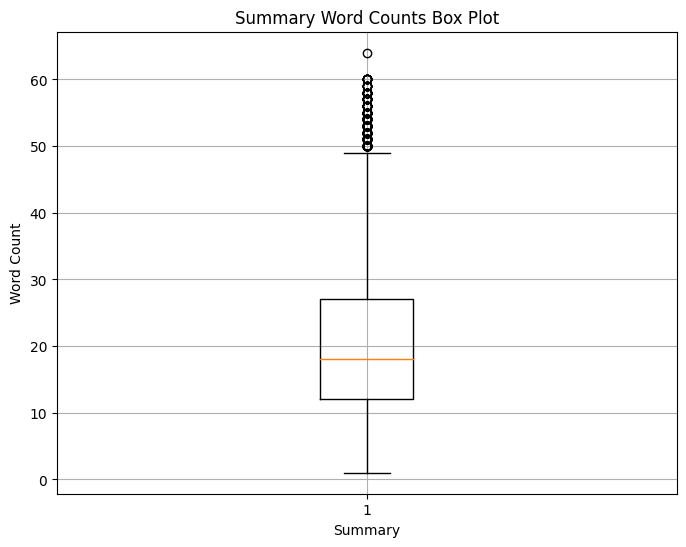

In [ ]:
#Show word distribution
full['Dialogue_Word_Count'] = full['dialogue'].apply(lambda x: len(str(x).split()))
full['Summary_Word_Count'] = full['summary'].apply(lambda x: len(str(x).split()))

# Plot the box plot for Dialogue
plt.figure(figsize=(8, 6))
plt.boxplot(full['Dialogue_Word_Count'])
plt.title('Dialogue Word Counts Box Plot')
plt.ylabel('Word Count')
plt.xlabel('Dialogue')
plt.grid(True)
plt.show()

# Plot the box plot for Summary
plt.figure(figsize=(8, 6))
plt.boxplot(full['Summary_Word_Count'])
plt.title('Summary Word Counts Box Plot')
plt.ylabel('Word Count')
plt.xlabel('Summary')
plt.grid(True)
plt.show()

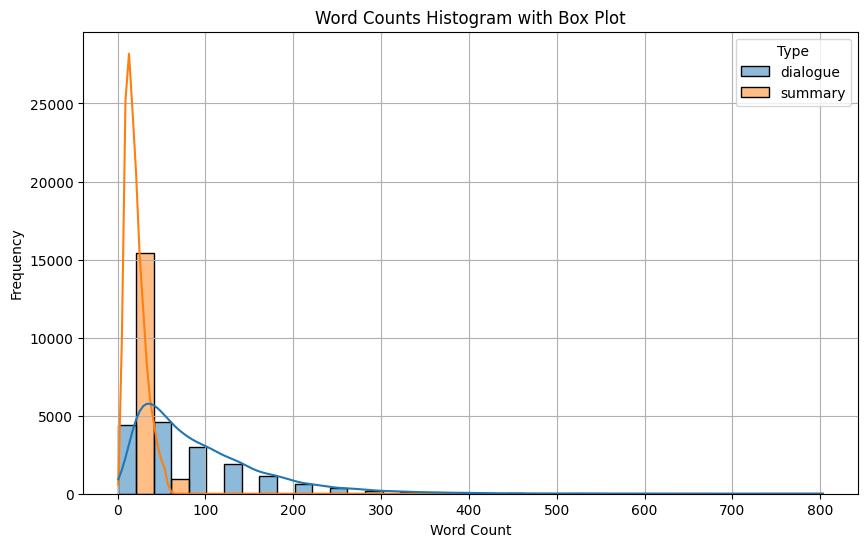

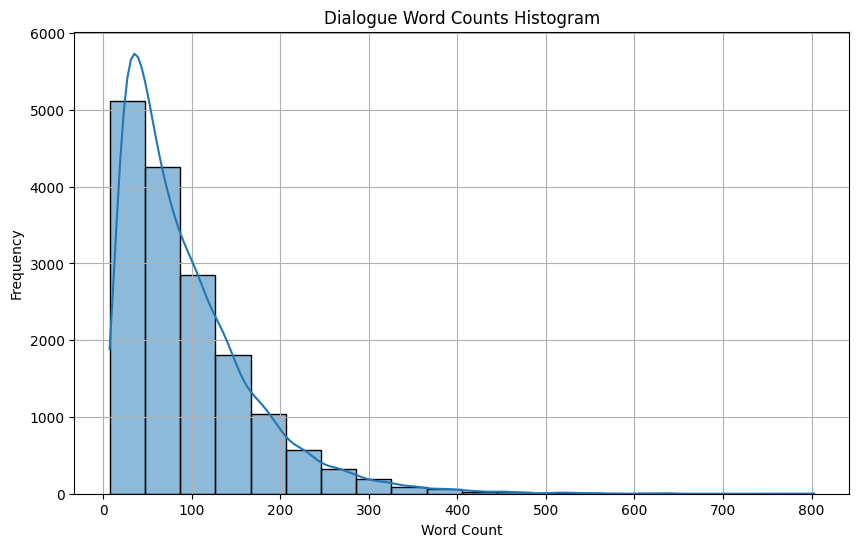

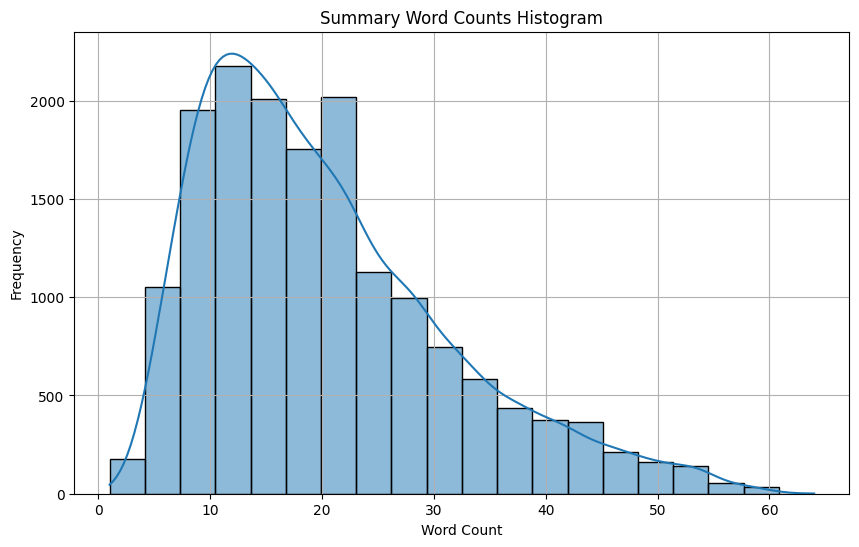

In [ ]:
#Word Distribution in Histogram

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Type': ['dialogue'] * len(full) + ['summary'] * len(full),
    'Word_Count': list(full['Dialogue_Word_Count']) + list(full['Summary_Word_Count'])
})
# Plot the histogram with box plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=plot_df, x='Word_Count', hue='Type', multiple="dodge", kde=True, bins=20)
plt.title('Word Counts Histogram with Box Plot')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram with box plot for Dialogue
plt.figure(figsize=(10, 6))
sns.histplot(data=full, x='Dialogue_Word_Count', kde=True, bins=20)
plt.title('Dialogue Word Counts Histogram')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram with box plot for Summary
plt.figure(figsize=(10, 6))
sns.histplot(data=full, x='Summary_Word_Count', kde=True, bins=20)
plt.title('Summary Word Counts Histogram')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Function to plot the correlation matrix
def plot_correlation_matrix(df, title, vmin, vmax):
    correlation_matrix = df.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, mask=mask, annot_kws={"size": 6}, cmap='coolwarm', vmin=vmin, vmax=vmax)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels and adjust font size
    plt.yticks(rotation=0, fontsize=10)  # Adjust y labels font size
    plt.title(title, fontsize=12)
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()

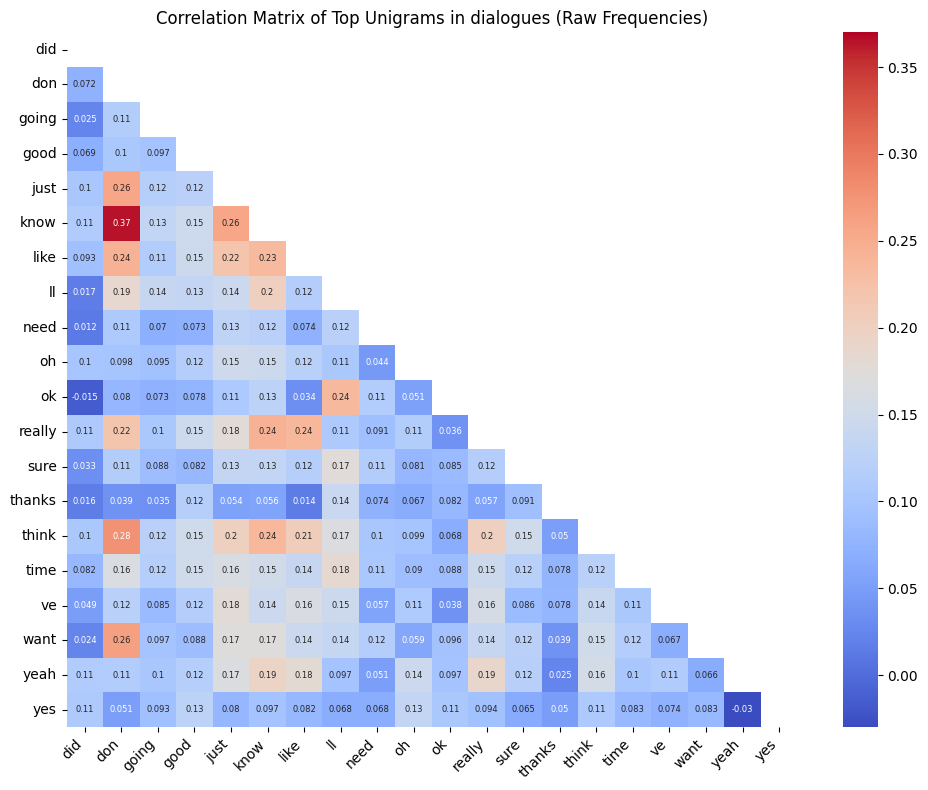

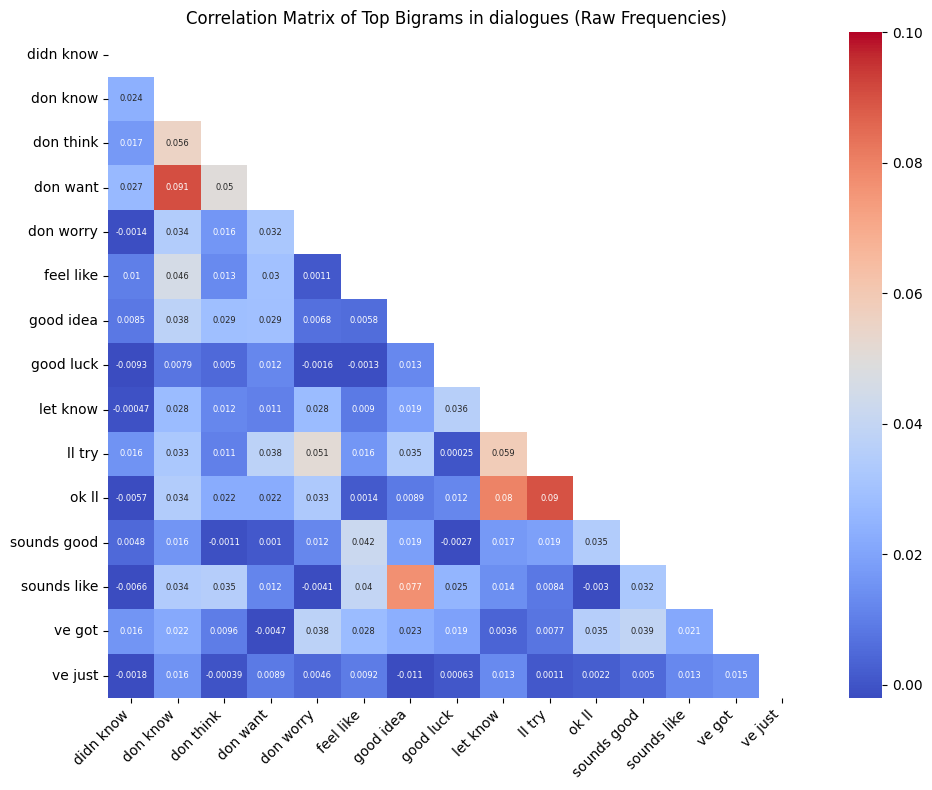

In [ ]:
#Show correlation between n-grams in dialogue columns
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer(max_features=20, stop_words='english', ngram_range=(1, 1))
x1 = vectorizer1.fit_transform(full['dialogue'].fillna(''))
df_bigram_freq1 = pd.DataFrame(x1.toarray(), columns=vectorizer1.get_feature_names_out())
plot_correlation_matrix(df_bigram_freq1, 'Correlation Matrix of Top Unigrams in dialogues (Raw Frequencies)', -0.03, 0.37)

vectorizer2 = CountVectorizer(max_features=15, stop_words='english', ngram_range=(2, 2))
x2 = vectorizer2.fit_transform(full['dialogue'].fillna(''))
df_bigram_freq2 = pd.DataFrame(x2.toarray(), columns=vectorizer2.get_feature_names_out())

plot_correlation_matrix(df_bigram_freq2, 'Correlation Matrix of Top Bigrams in dialogues (Raw Frequencies)', -0.002, 0.1)


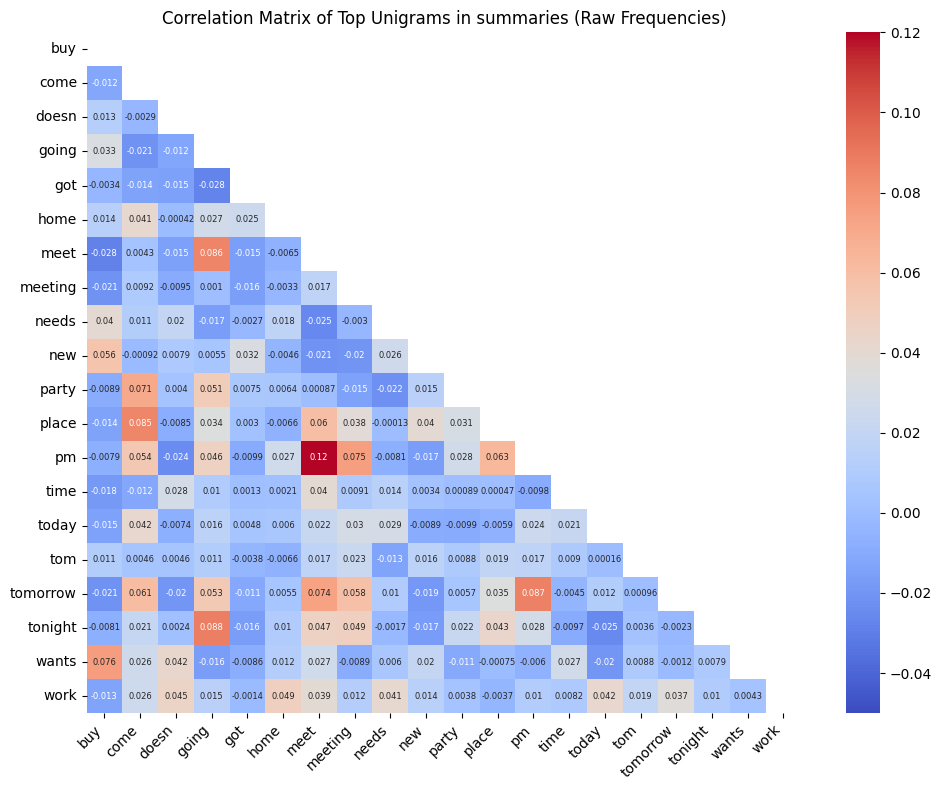

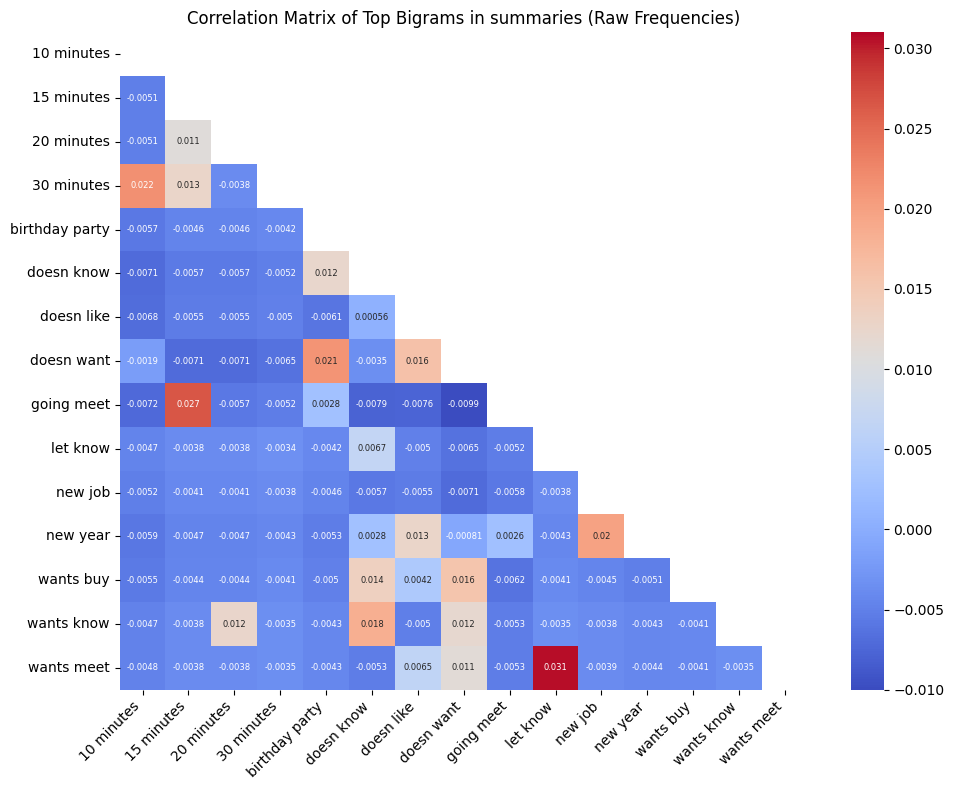

In [ ]:
#Show correlation between n-grams in summary columns
vectorizer3 = CountVectorizer(max_features=20, stop_words='english', ngram_range=(1, 1))
x3 = vectorizer3.fit_transform(full['summary'].fillna(''))
df_bigram_freq2 = pd.DataFrame(x3.toarray(), columns=vectorizer3.get_feature_names_out())

plot_correlation_matrix(df_bigram_freq2, 'Correlation Matrix of Top Unigrams in summaries (Raw Frequencies)',-0.05,0.12)

vectorizer4 = CountVectorizer(max_features=15, stop_words='english', ngram_range=(2, 2))
x4 = vectorizer4.fit_transform(full['summary'].fillna(''))
df_bigram_freq2 = pd.DataFrame(x4.toarray(), columns=vectorizer4.get_feature_names_out())

plot_correlation_matrix(df_bigram_freq2, 'Correlation Matrix of Top Bigrams in summaries (Raw Frequencies)',-0.01,0.031)